# Medical Insurance Cost Prediction
*original dataset: [kaggle.com/datasets/hetmengar/medical-insurance-cost-prediction](https://www.kaggle.com/datasets/hetmengar/medical-insurance-cost-prediction)*


Use a linear regression to predict the cost of medical insurance given a patient's personal health indicators

**Personal Health Indicators:**

- Smoker
- Gender
- Region
- BMI
- Age

In [50]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [51]:
import pandas as pd
df=pd.read_csv('/content/medical-charges.csv')

In [52]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# How does smoking affect health insurance?

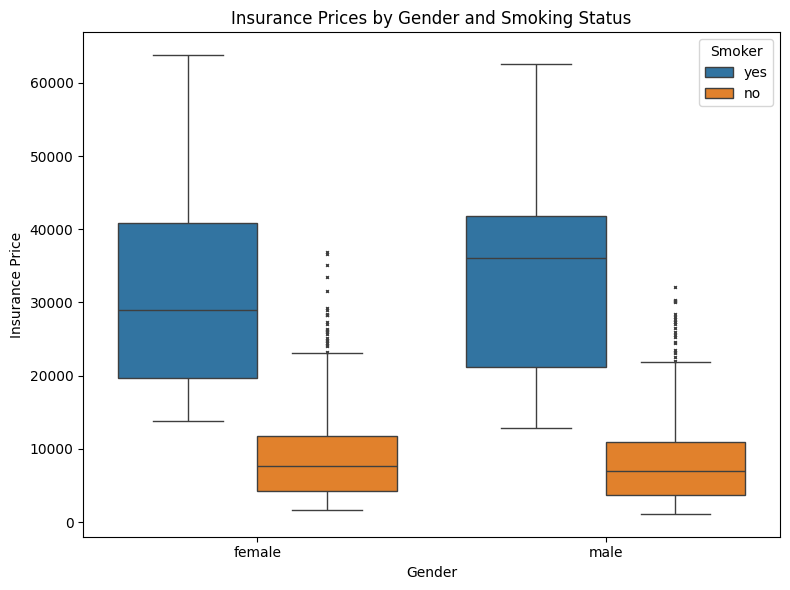

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df,
    x="sex",
    y="charges",
    hue="smoker",
    flierprops=dict(marker='x', color='red', markersize=2, alpha=1)  # Outlier customization

)

plt.title("Insurance Prices by Gender and Smoking Status")
plt.xlabel("Gender")
plt.ylabel("Insurance Price")
plt.legend(title="Smoker")

plt.tight_layout()
plt.show()


# There is definitely a correlation between smoking status and insurance price

However, there seems to be no correlation between gender and insurance prices (given smoking status)

Do something with this data

# Predict healthcare insurance prices given these characteristics

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.get_dummies(
    df,
    columns=["sex", "smoker", "region"],
    drop_first=True
)


In [55]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [56]:
# seperate the charges into a seperate table y
X = df.drop("charges", axis=1)
y = df["charges"]


In [57]:
X,y

(      age     bmi  children  sex_male  smoker_yes  region_northwest  \
 0      19  27.900         0     False        True             False   
 1      18  33.770         1      True       False             False   
 2      28  33.000         3      True       False             False   
 3      33  22.705         0      True       False              True   
 4      32  28.880         0      True       False              True   
 ...   ...     ...       ...       ...         ...               ...   
 1333   50  30.970         3      True       False              True   
 1334   18  31.920         0     False       False             False   
 1335   18  36.850         0     False       False             False   
 1336   21  25.800         0     False       False             False   
 1337   61  29.070         0     False        True              True   
 
       region_southeast  region_southwest  
 0                False              True  
 1                 True             False  
 2

In [58]:
# split into test and train sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [60]:
# scale data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [62]:
# build model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="mse",
    metrics=["mae"]
)

In [64]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 312469600.0000 - mae: 13081.9316 - val_loss: 308946080.0000 - val_mae: 12611.6982
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 310801504.0000 - mae: 13346.5439 - val_loss: 295401280.0000 - val_mae: 12238.6904
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 292526304.0000 - mae: 12847.0430 - val_loss: 245804480.0000 - val_mae: 10854.6670
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 214580736.0000 - mae: 10434.0205 - val_loss: 150906160.0000 - val_mae: 7934.6260
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 134539552.0000 - mae: 7751.2695 - val_loss: 68261392.0000 - val_mae: 5031.1514
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 62595356.0000 - mae: 5333.6230 - val_loss: 41552696.0000 - val_mae: 4398.8818
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 45383320.0000 - mae: 4707.2222 - val_loss: 36109872.0000 - val_mae: 4198.2881
Epoch 8/100
27/27 ━━━━━━

In [65]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: ${mae:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20033658.0000 - mae: 2747.1675 
Test MAE: $2838.98


In [68]:
predictions = model.predict(X_test[:5])
print("Predicted charges:", predictions.flatten())
print("Actual charges:", y_test.iloc[:5].values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted charges: [10788.238  6672.214 33790.1    9988.424 28876.201]
Actual charges: [ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918 ]
